In [156]:
import numpy as np
import matplotlib.pyplot as plt

In [157]:
# Define the parameters
SI = 0.72     # Insulin sensitivity
EG0 = 1.44    # Glucose effectiveness at zero insulin
R0 = 864      # Net rate of glucose production at zero glucose
sigma = 43.2  # Maximal rate of insulin secretion
alpha = 20000 # Glucose concentration at half maximal insulin secretion rate
k = 432       # Rate constant for insulin clearance

# Parameters for the slow subsystem
d0 = 0.06     # Death rate at zero glucose
r1 = 0.84e-3  # First order replication rate coefficient
r2 = 0.24e-5  # Second order death rate coefficient


In [158]:
# Define the nullcline functions
def glucose_nullcline(I, EG0, SI, R0):
    return R0 / (EG0 + SI * I)

In [159]:
def insulin_nullcline(G, beta, sigma, alpha, k):
    return (beta * sigma * G**2) / (alpha + G**2) / k

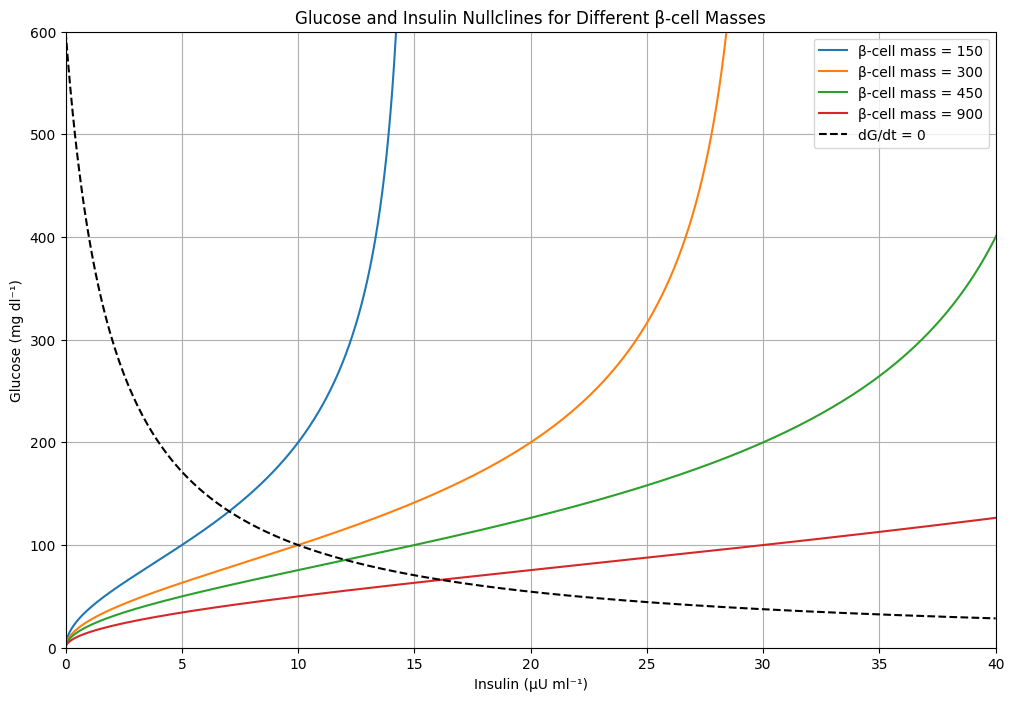

In [160]:
# Define the range for insulin and glucose
I_range = np.linspace(0, 40, 400)  # Extend insulin range for plotting nullclines
G_range = np.linspace(0, 600, 400)  # Extend glucose range for plotting nullclines

# Calculate nullclines for different β-cell mass values
betas = [150, 300, 450, 900]
nullclines_data = []
for beta in betas:
    I_nullcline = insulin_nullcline(G_range, beta, sigma, alpha, k)
    nullclines_data.append((G_range, I_nullcline))

# Plot the nullclines for insulin dynamics
plt.figure(figsize=(12, 8))
for i, beta in enumerate(betas):
    plt.plot(nullclines_data[i][1], nullclines_data[i][0], label=f'β-cell mass = {beta}')

# Now plot the dG/dt = 0 nullcline (glucose nullcline)
G_nullcline = glucose_nullcline(I_range, EG0, SI, R0)
plt.plot(I_range, G_nullcline, label='dG/dt = 0', color='black', linestyle='--')

# Add labels and legend
plt.xlabel('Insulin (μU ml⁻¹)')
plt.ylabel('Glucose (mg dl⁻¹)')
plt.title('Glucose and Insulin Nullclines for Different β-cell Masses')
plt.legend()
plt.grid(True)
plt.xlim(0, 40)
plt.ylim(0, 600)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


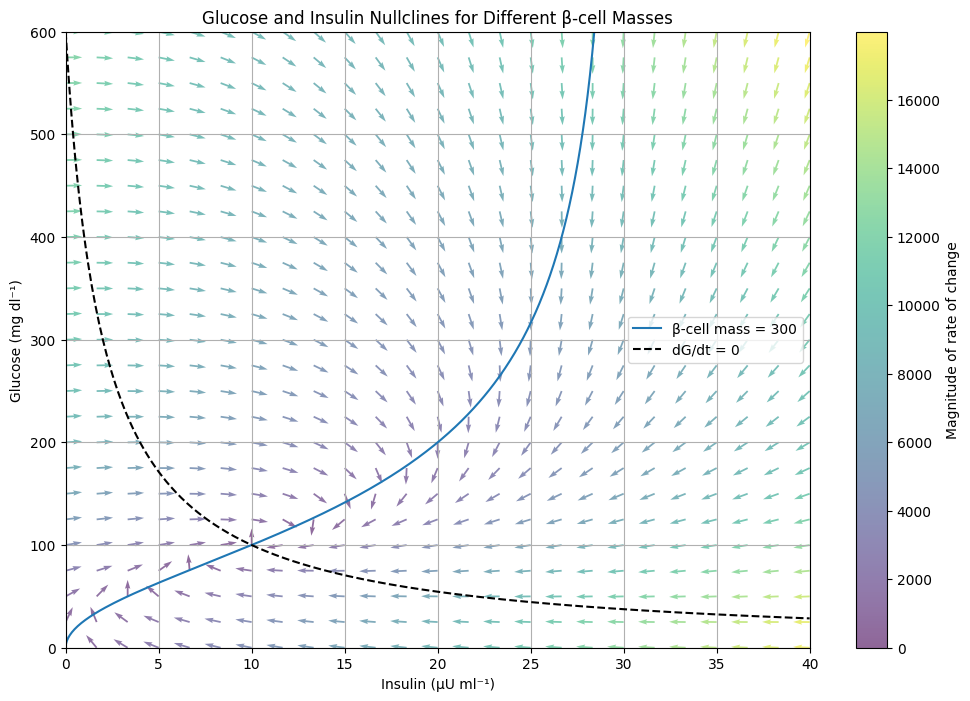

In [161]:
nx, ny = 25, 25
x = np.linspace(0, 40, nx)
y = np.linspace(0, 600, ny)
X, Y = np.meshgrid(x, y)

beta = 300
dy = R0 - (EG0 + SI * X) * Y
dx = (beta * sigma * Y**2) / (alpha + Y**2) - k * X

M = np.sqrt(dx**2 + dy**2)

dx_norm = dx / M
dy_norm = dy / M

plt.figure(figsize=(12, 8))
quiver = plt.quiver(X, Y, dx_norm, dy_norm, M, alpha=0.6, cmap='viridis')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mutually Inhibiting Circuit Phase Plane')

# Define the range for insulin and glucose
I_range = np.linspace(0, 40, 400)  # Extend insulin range for plotting nullclines
G_range = np.linspace(0, 600, 400)  # Extend glucose range for plotting nullclines

# Calculate nullclines for different β-cell mass values
nullclines_data = []
I_nullcline = insulin_nullcline(G_range, 300, sigma, alpha, k)

plt.plot(I_nullcline, G_range, label=f'β-cell mass = {beta}')
G_nullcline = glucose_nullcline(I_range, EG0, SI, R0)
plt.plot(I_range, G_nullcline, label='dG/dt = 0', color='black', linestyle='--')

# Add labels and legend
plt.xlabel('Insulin (μU ml⁻¹)')
plt.ylabel('Glucose (mg dl⁻¹)')
plt.title('Glucose and Insulin Nullclines for Different β-cell Masses')
plt.colorbar(quiver, label='Magnitude of rate of change')
plt.grid(True)
plt.legend()
plt.xlim(0, 40)
plt.ylim(0, 600)
plt.show()

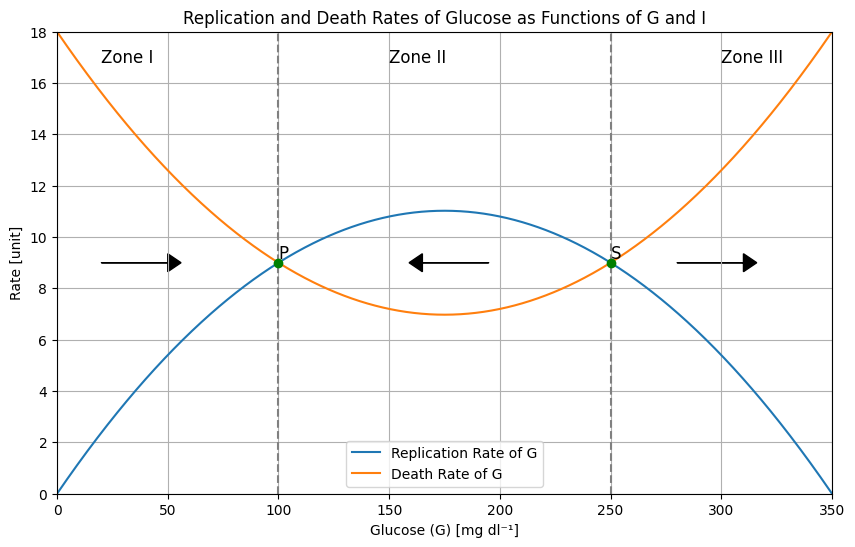

In [162]:
# Define the parameters
r1 = 0.00084
r2 = 0.0000024
r1r = r1/2
r2r = r2/2
r1a = r1 - r1r
r2a = r2 - r2r
d0 = 0.06

# Define the production and degradation rate functions for G
def replication_rate_G(G):  # Add additional parameters if needed
    return (r1r * G - r2r * G * G) * beta

def death_rate_G(G):  # Add additional parameters if needed
    return (d0 - r1a * G + r2a * G * G) * beta

# Use the solution to calculate production and degradation rates of G
G_vals = np.linspace(0, 350, 1000)
replication_rates = replication_rate_G(G_vals)
death_rates = death_rate_G(G_vals)

# Create the plot for production and degradation rates of G
plt.figure(figsize=(10, 6))
plt.plot(G_vals, replication_rates, label='Replication Rate of G')
plt.plot(G_vals, death_rates, label='Death Rate of G')
plt.xlabel('Glucose (G) [mg dl⁻¹]')
plt.ylabel('Rate [unit]')
plt.title('Replication and Death Rates of Glucose as Functions of G and I')
plt.legend()
plt.grid(True)

# Add labels and annotations for zones
plt.axvline(x=100, color='grey', linestyle='--')
plt.axvline(x=250, color='grey', linestyle='--')
plt.text(20, 17, 'Zone I', fontsize=12, verticalalignment='center')
plt.text(150, 17, 'Zone II', fontsize=12, verticalalignment='center')
plt.text(300, 17, 'Zone III', fontsize=12, verticalalignment='center')
plt.xlim(0, 350)
plt.ylim(0, 18)

start_x = [20, 195, 280]
start_y = 9
dx = 30
dy = 0

plt.arrow(start_x[0], start_y, dx, dy, head_width=0.7, head_length=6, fc='k', ec='k')
plt.arrow(start_x[1], start_y, -1 * dx, dy, head_width=0.7, head_length=6, fc='k', ec='k')
plt.arrow(start_x[2], start_y, dx, dy, head_width=0.7, head_length=6, fc='k', ec='k')

# Fixed points
plt.plot(100, 9, 'go')
plt.plot(250, 9, 'go')
plt.text(100, 9, 'P', fontsize=12, verticalalignment='bottom')
plt.text(250, 9, 'S', fontsize=12, verticalalignment='bottom')

plt.show()


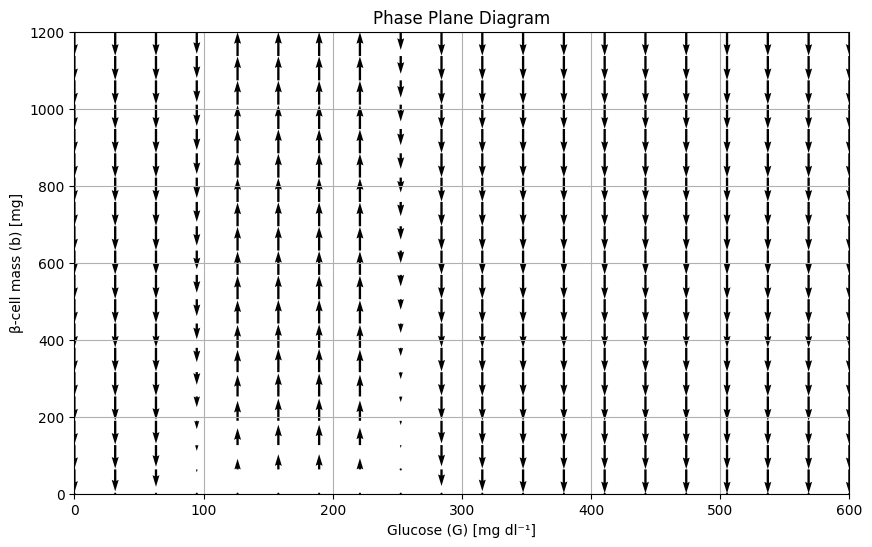

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation db/dt (change of β-cell mass with respect to time)
def db_dt(G, b):
    # Replace this with your specific differential equation for db/dt
    # For example: return 0.01 * b - 0.02 * G
    return (-1 * d0 + r1 * G - r2 * G * G) * b

# Define the range for G and b
G_values = np.linspace(0, 600, 20)  # Glucose range
b_values = np.linspace(0, 1200, 20) # β-cell mass range
G_grid, b_grid = np.meshgrid(G_values, b_values)

# Compute db/dt at each point on the grid
db_values = db_dt(G_grid, b_grid)

# Normalize the vectors for the quiver plot (we'll use a constant change in G since db/dt is given)
U = np.zeros_like(db_values)
V = db_values / np.sqrt(db_values**2 + 1)  # Normalized change in β-cell mass

# Plot the phase plane diagram
plt.figure(figsize=(10, 6))
plt.quiver(G_grid, b_grid, U, V, angles='xy')

# Add fixed points and other features based on your system
# Replace the coordinates with the actual values from your model
# plt.plot([300], [100], 'ko')  # Example of a physiological fixed point
# plt.plot([37], [250], 'ko')   # Example of a saddle point
# plt.plot([0], [600], 'ko')    # Example of a pathological fixed point

# Add labels and annotations
plt.xlabel('Glucose (G) [mg dl⁻¹]')
plt.ylabel('β-cell mass (b) [mg]')
plt.title('Phase Plane Diagram')
plt.xlim(0, 600)
plt.ylim(0, 1200)
plt.grid(True)
plt.show()
